In [2]:
import sys
sys.path.append("..")  # Adjusts the path to include the parent directory

from rps_simulation.rps_base import RPS_Basic, RPS_Basic_Multirun  # Importing RPS_Basic class from rps_base.py
from rps_simulation.learning_curves import exponential_learning, logistic_learning
from rps_simulation.forgetting_curves import exponential_forgetting 
from rps_simulation.practice_rate import simple_linear_rate 
from rps_simulation.waiting_times import exponential_waiting_time 
from rps_simulation.dynamical_models import logistic_model, general_model
from rps_simulation.sensitivity_analysis import RPS_sensitivity # sensitivity analysis

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(10)


# 1. Logistic Learning Curve:
We use the **Basic RPS Model**. 

Default Parameters: $a = 0.2, b=5, \alpha=0.4, \beta=0.3 $

Also, initial conditions:  $S_0 = 0.1, \lambda_0 = 1$



In [3]:
# run model for different values of parameter a and b:
a_vals = np.round(np.linspace(0, 1, 21), 3)
b_vals = np.round(np.linspace(0.2, 10.2, 21),3)

log_par_dict =  {'a': a_vals, 
                 'b': b_vals, 
                 'alpha': 0.4, 
                 'beta': 0.3, 
                 'initial_skill': 0.1}

log_sen = RPS_sensitivity(log_par_dict, learning='logistic', forgetting='exp', 
                          practice_rate='simple', waiting_time='exp')
df_log_pars = log_sen.df_par
log_sen.run_sensitivity_analysis(quit_thresh=0.1, n_sims=100, max_time=100)
df_log_sim = log_sen.df_sim


In [5]:
df_log_sim.head(5)

,a,b,alpha,beta,initial_skill,final_skills,n_prac,prop_quit
0,0.0,0.2,0.4,0.3,0.1,2.474190e-14,3,1.0
1,0.0,0.2,0.4,0.3,0.1,2.506216e-14,3,1.0
2,0.0,0.2,0.4,0.3,0.1,2.475364e-14,3,1.0
3,0.0,0.2,0.4,0.3,0.1,2.494453e-14,3,1.0
4,0.0,0.2,0.4,0.3,0.1,1.798122e-14,2,1.0


## 1.1 Parameter $a$:

In [32]:
a_vals

[0, 0.25, 0.5, 0.75, 1]

In [29]:
#rev_palette = sns.color_palette('mako').reverse()

######### Processing Data ###########

b_fixed = 5.2 # fix value of parameter b to a high one
a_vals = [0, 0.25, 0.5, 0.75, 1]

df_log_a = df_log_sim[(df_log_sim['b']==b_fixed) & (df_log_sim['a'].isin(a_vals))]
df_log_a


,a,b,alpha,beta,initial_skill,final_skills,n_prac,prop_quit
1000,0.0,5.2,0.4,0.3,0.1,8.468650e-01,348,0.91
1001,0.0,5.2,0.4,0.3,0.1,1.300800e-13,8,0.91
1002,0.0,5.2,0.4,0.3,0.1,9.376289e-14,7,0.91
1003,0.0,5.2,0.4,0.3,0.1,4.960473e-14,5,0.91
1004,0.0,5.2,0.4,0.3,0.1,4.729547e-13,12,0.91
...,...,...,...,...,...,...,...,...
43095,1.0,5.2,0.4,0.3,0.1,9.126282e-01,521,0.00
43096,1.0,5.2,0.4,0.3,0.1,8.940236e-01,552,0.00
43097,1.0,5.2,0.4,0.3,0.1,9.093609e-01,588,0.00
43098,1.0,5.2,0.4,0.3,0.1,8.846188e-01,560,0.00


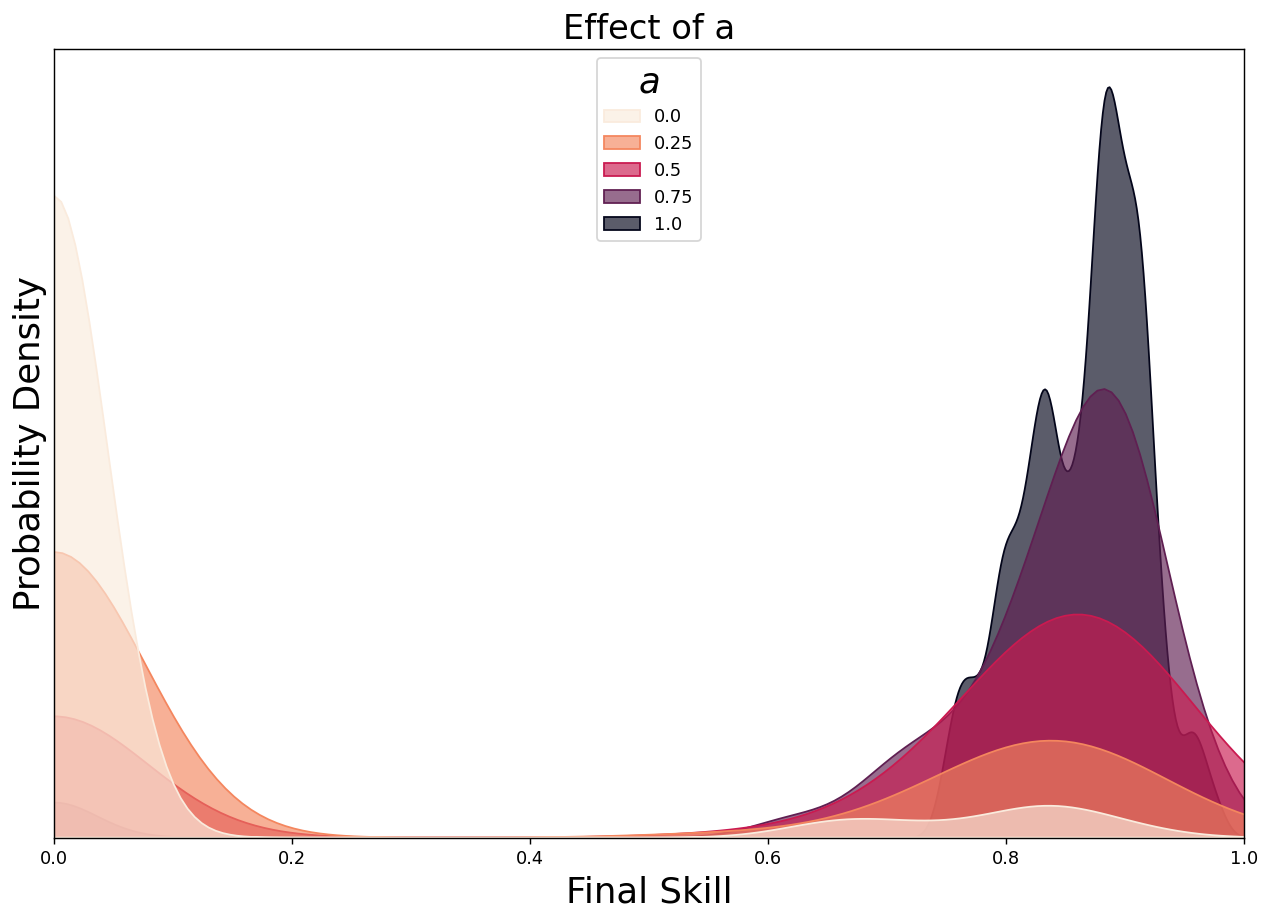

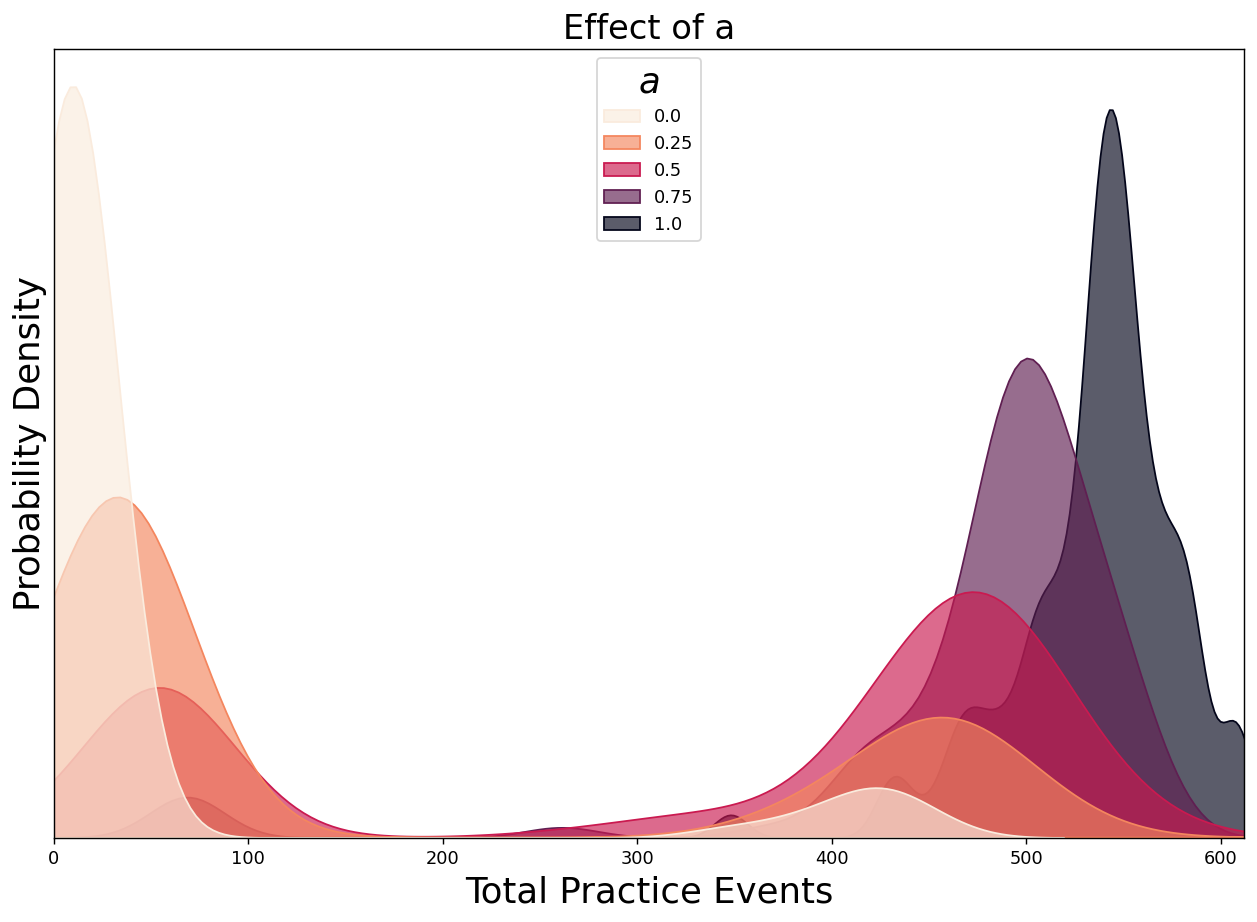

In [30]:
########################
## HISTOGRAM: FINAL SKILL
########################

# Set up the matplotlib figure
plt.figure(figsize=(12, 8), dpi=128)
#with sns.color_palette("mako"):
#ax_log = sns.kdeplot(df_log_a, x='final_skills', hue='a', alpha=.7, palette='rocket_r', fill=True,  bw_adjust=0.07, multiple='stack')
ax_log = sns.kdeplot(df_log_a, x='final_skills', hue='a', alpha=.65, palette='rocket_r', fill=True,  bw_adjust=0.5)
plt.title('Effect of a', fontsize=19)
plt.xlim([0,1])
#plt.ylim([0,8])
#plt.tick_params(left=True, labelleft=True)

plt.tick_params(left=False, labelleft=False)
plt.xlabel('Final Skill', fontsize=20)
plt.ylabel('Probability Density', fontsize=20)
#plt.legend('a', fontsize=17)
#sns.move_legend(ax_log, "upper left")

# for legend text
plt.setp(ax_log.get_legend().get_texts(), fontsize='18')  
# for legend title
plt.setp(ax_log.get_legend().get_title(), fontsize='20', text='$a$', fontweight='bold')  
sns.move_legend(ax_log, "upper center")

#plt.savefig('../plots/sens_logistic_a_finalS.png', dpi=512)
# Display the plot
plt.show()

####################################
## HISTOGRAM: TOTAL PRACTICE EVENTS
###################################

# Set up the matplotlib figure
plt.figure(figsize=(12, 8), dpi=128)
#with sns.color_palette("mako"):
ax_log = sns.kdeplot(df_log_a, x='n_prac', hue='a', alpha=.65, palette='rocket_r', fill=True,  bw_adjust=0.5)
plt.title('Effect of a', fontsize=19)
plt.xlim([0,max(df_log_a['n_prac'])])
#plt.tick_params(left=True, labelleft=True)

plt.tick_params(left=False, labelleft=False)
plt.xlabel('Total Practice Events', fontsize=20)
plt.ylabel('Probability Density', fontsize=20)
#plt.legend('a', fontsize=17)

# for legend text
plt.setp(ax_log.get_legend().get_texts(), fontsize='20')  
# for legend title
plt.setp(ax_log.get_legend().get_title(), fontsize='20', text='$a$', fontweight='heavy')  
sns.move_legend(ax_log, "upper center")

#plt.savefig('../plots/sens_logistic_a_nprac.png', dpi=512)
# Display the plot
plt.show()

## 1.2 Parameter $b$

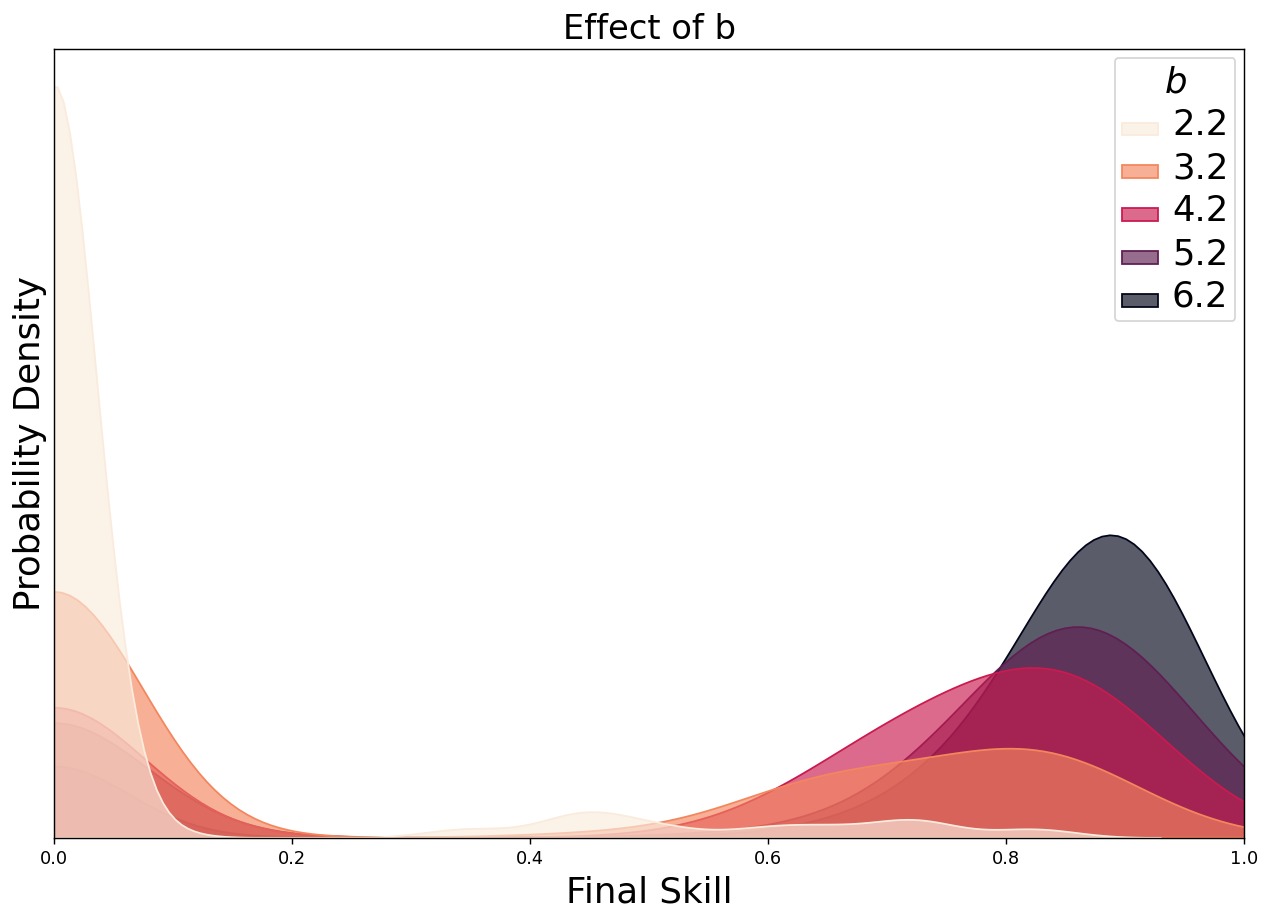

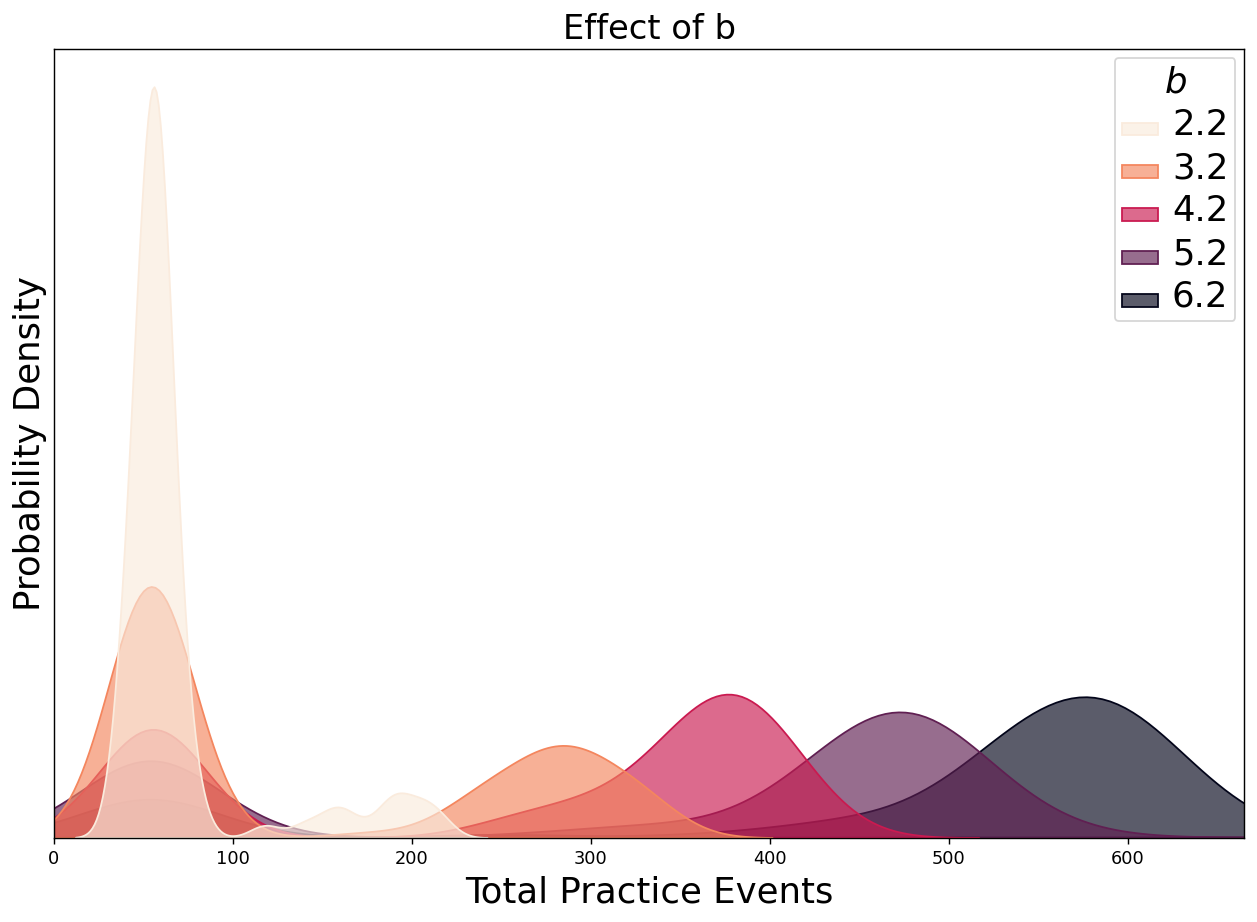

In [37]:
a_fixed = 0.5 # fix value of parameter a
b_vals = [2.2 + i for i in range(5)]

df_log_b = df_log_sim[(df_log_sim['a']==a_fixed) & (df_log_sim['b'].isin(b_vals))]

########################
## HISTOGRAM: FINAL SKILL
########################

# Set up the matplotlib figure
plt.figure(figsize=(12, 8), dpi=128)
ax_log = sns.kdeplot(df_log_b, x='final_skills', hue='b', alpha=.65, palette='rocket_r', fill=True,  bw_adjust=0.5)
plt.title('Effect of b', fontsize=19)
plt.xlim([0,1])
plt.tick_params(left=False, labelleft=False)
plt.xlabel('Final Skill', fontsize=20)
plt.ylabel('Probability Density', fontsize=20)
#sns.move_legend(ax_log, "upper left")

# for legend text
plt.setp(ax_log.get_legend().get_texts(), fontsize='20')  
# for legend title
plt.setp(ax_log.get_legend().get_title(), fontsize='20', text='$b$', fontweight='heavy')  

plt.savefig('../plots/sens_logistic_b_finalS.png', dpi=512)
# Display the plot
plt.show()

####################################
## HISTOGRAM: TOTAL PRACTICE EVENTS
###################################

# Set up the matplotlib figure
plt.figure(figsize=(12, 8), dpi=128)
ax_log = sns.kdeplot(df_log_b, x='n_prac', hue='b', alpha=.65, palette='rocket_r', fill=True,  bw_adjust=0.5)
plt.title('Effect of b', fontsize=19)
plt.xlim([0,max(df_log_b['n_prac'])])
#plt.tick_params(left=True, labelleft=True)
plt.tick_params(left=False, labelleft=False)
plt.xlabel('Total Practice Events', fontsize=20)
plt.ylabel('Probability Density', fontsize=20)
# for legend text
plt.setp(ax_log.get_legend().get_texts(), fontsize='20')  
# for legend title
plt.setp(ax_log.get_legend().get_title(), fontsize='20', text='$b$', fontweight='heavy')  
#sns.move_legend(ax_log, "upper left")

plt.savefig('../plots/sens_logistic_b_nprac.png', dpi=512)
# Display the plot
plt.show()

## 1.3 Heatmaps $a,b$:

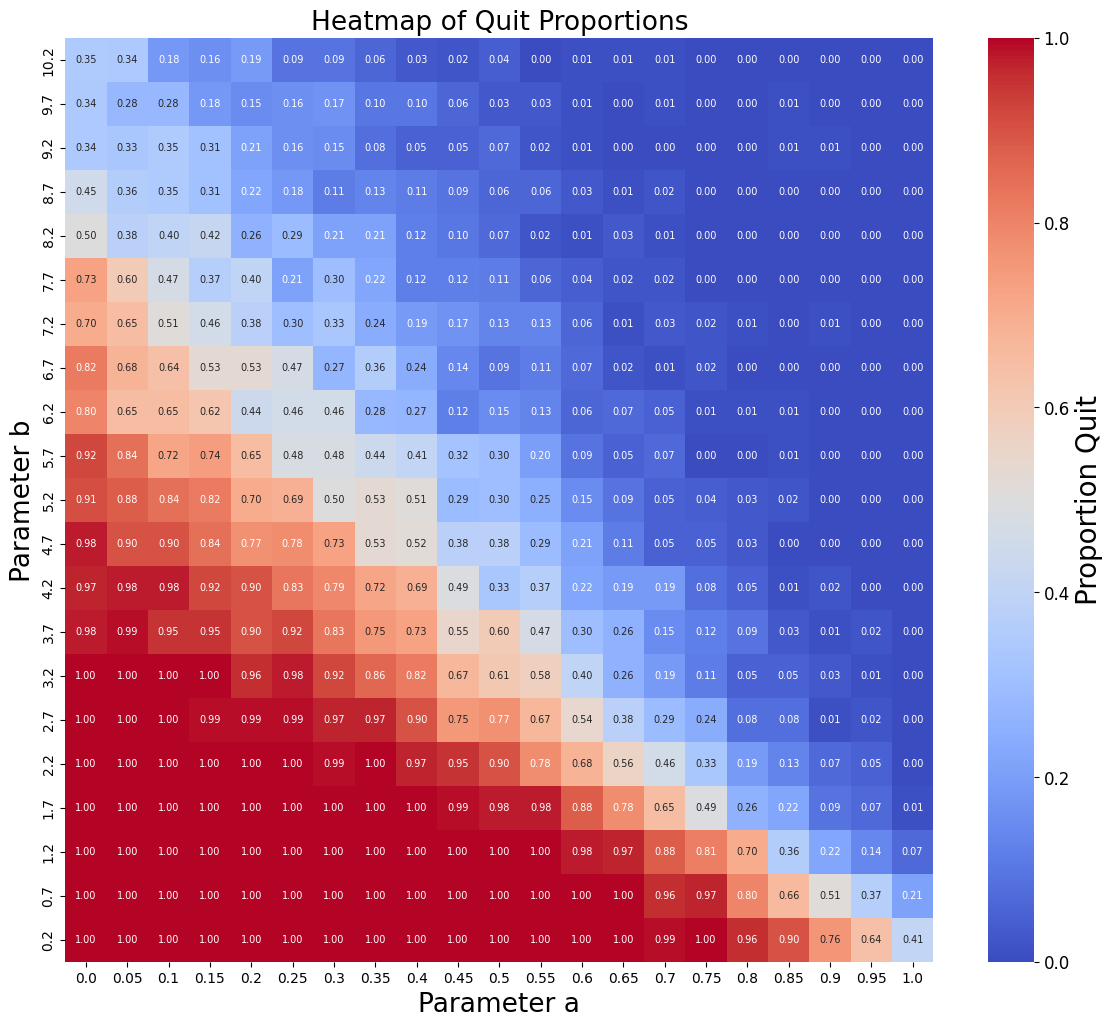

In [41]:
pivot_table = df_log_pars.pivot(index="b", columns="a", values="prop_quit")

# Plotting the heatmap
plt.figure(figsize=(14, 12))
#ax = sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap="coolwarm", annot_kws={"fontsize":6}, cbar_kws={'label': 'Proportion Quit'})
ax = sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap="coolwarm", annot_kws={"fontsize":7})

ax.figure.axes[-1].set_ylabel('Proportion Quit', size=20)
plt.gca().invert_yaxis()

# Increase the label size for the color bar
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=12)


plt.title('Heatmap of Quit Proportions', fontsize=19)
plt.xlabel('Parameter a', fontsize=19)
plt.ylabel('Parameter b', fontsize=19)
#plt.savefig('../plots/sens_log_heatmap_ab.png', dpi=512)
plt.show()

## 1.4 parameters $\alpha,\beta$



In [39]:
# run model for different values of parameter a and b:
alpha_vals = np.round(np.linspace(0.1, 1.1, 21), 3)
beta_vals = np.round(np.linspace(0.05, 0.55, 21),3)

log_par_dict =  {'alpha': alpha_vals, 
                 'beta': beta_vals, 
                 'a': 0.3, 
                 'b': 5, 
                 'initial_skill': 0.1}

log_sen_alp_bet = RPS_sensitivity(log_par_dict, learning='logistic', forgetting='exp', 
                          practice_rate='simple', waiting_time='exp')
df_log_pars_alp_bet = log_sen_alp_bet.df_par
log_sen_alp_bet.run_sensitivity_analysis(quit_thresh=0.1, n_sims=50, max_time=100)
df_log_sim_alp_bet = log_sen_alp_bet.df_sim


KeyboardInterrupt: 

### Logistic $\alpha$

In [215]:
#rev_palette = sns.color_palette('mako').reverse()

######### Processing Data ###########

beta_fixed = 0.3 # fix value of parameter beta
alpha_vals = [0.2, 0.4, 0.6, 0.8, 1.0]

df_log_alp = df_log_sim_alp_bet[(df_log_sim_alp_bet['beta']==beta_fixed) & (df_log_sim_alp_bet['alpha'].isin(alpha_vals))]
df_log_alp

,alpha,beta,a,b,initial_skill,final_skills,n_prac,prop_quit
2600,0.2,0.3,0.2,5.0,0.1,1.734045e-12,29,1.0
2601,0.2,0.3,0.2,5.0,0.1,1.260886e-12,27,1.0
2602,0.2,0.3,0.2,5.0,0.1,2.917413e-12,32,1.0
2603,0.2,0.3,0.2,5.0,0.1,7.973633e-13,25,1.0
2604,0.2,0.3,0.2,5.0,0.1,4.951392e-13,22,1.0
...,...,...,...,...,...,...,...,...
19445,1.0,0.3,0.2,5.0,0.1,8.544875e-01,526,0.0
19446,1.0,0.3,0.2,5.0,0.1,9.529132e-01,515,0.0
19447,1.0,0.3,0.2,5.0,0.1,9.652237e-01,523,0.0
19448,1.0,0.3,0.2,5.0,0.1,8.980544e-01,480,0.0


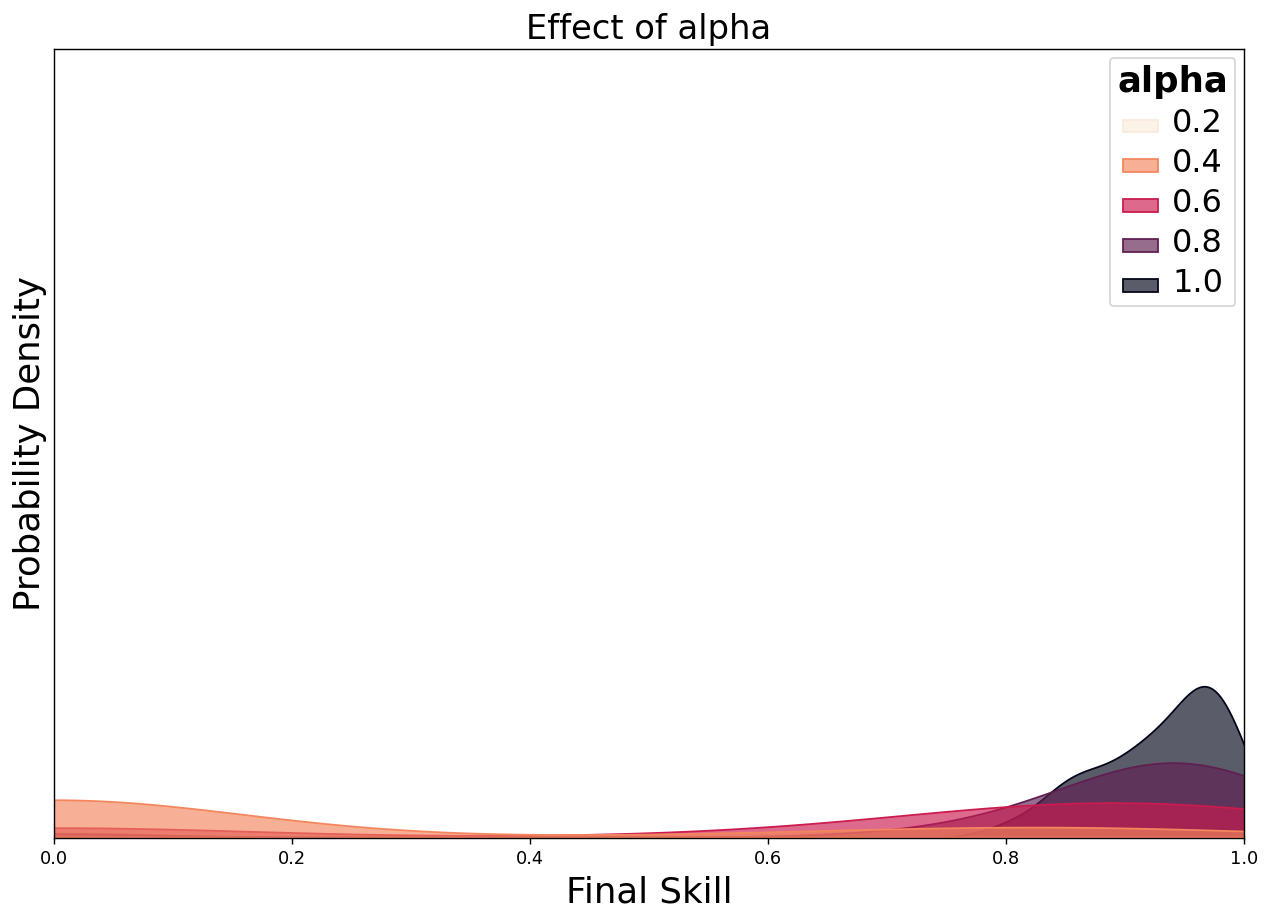

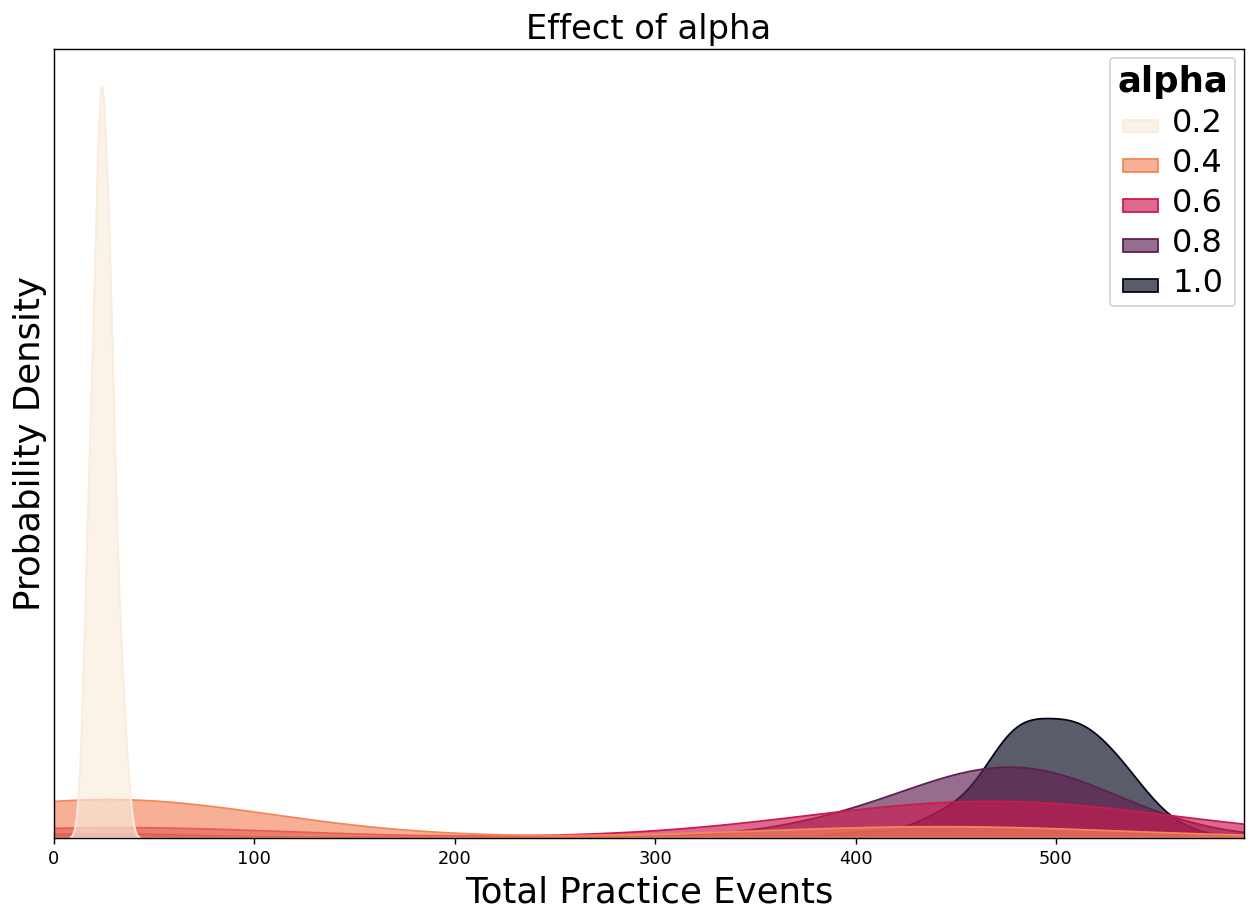

In [221]:
########################
## HISTOGRAM: FINAL SKILL
########################

# Set up the matplotlib figure
plt.figure(figsize=(12, 8), dpi=128)
#with sns.color_palette("mako"):
#ax_log = sns.kdeplot(df_log_a, x='final_skills', hue='a', alpha=.7, palette='rocket_r', fill=True,  bw_adjust=0.07, multiple='stack')
ax_log = sns.kdeplot(df_log_alp, x='final_skills', hue='alpha', alpha=.65, palette='rocket_r', fill=True,  bw_adjust=1)
plt.title('Effect of alpha', fontsize=19)
plt.xlim([0,1])
plt.ylim([0,8])
#plt.tick_params(left=True, labelleft=True)

plt.tick_params(left=False, labelleft=False)
plt.xlabel('Final Skill', fontsize=20)
plt.ylabel('Probability Density', fontsize=20)
#plt.legend('a', fontsize=17)
#sns.move_legend(ax_log, "upper left")

# for legend text
plt.setp(ax_log.get_legend().get_texts(), fontsize='18')  
# for legend title
plt.setp(ax_log.get_legend().get_title(), fontsize='20', text='alpha', fontweight='heavy')  

#plt.savefig('../plots/sens_logistic_alpha_finalS.png', dpi=512)
# Display the plot
plt.show()

####################################
## HISTOGRAM: TOTAL PRACTICE EVENTS
###################################

# Set up the matplotlib figure
plt.figure(figsize=(12, 8), dpi=128)
#with sns.color_palette("mako"):
ax_log = sns.kdeplot(df_log_alp, x='n_prac', hue='alpha', alpha=.65, palette='rocket_r', fill=True,  bw_adjust=1)
plt.title('Effect of alpha', fontsize=19)
plt.xlim([0,max(df_log_a['n_prac'])])
#plt.tick_params(left=True, labelleft=True)

plt.tick_params(left=False, labelleft=False)
plt.xlabel('Total Practice Events', fontsize=20)
plt.ylabel('Probability Density', fontsize=20)
#plt.legend('a', fontsize=17)

# for legend text
plt.setp(ax_log.get_legend().get_texts(), fontsize='18')  
# for legend title
plt.setp(ax_log.get_legend().get_title(), fontsize='20', text='alpha', fontweight='heavy')  
#sns.move_legend(ax_log, "upper left")

#plt.savefig('../plots/sens_logistic_alpha_nprac.png', dpi=512)
# Display the plot
plt.show()

### Heatmap $\alpha, \beta$

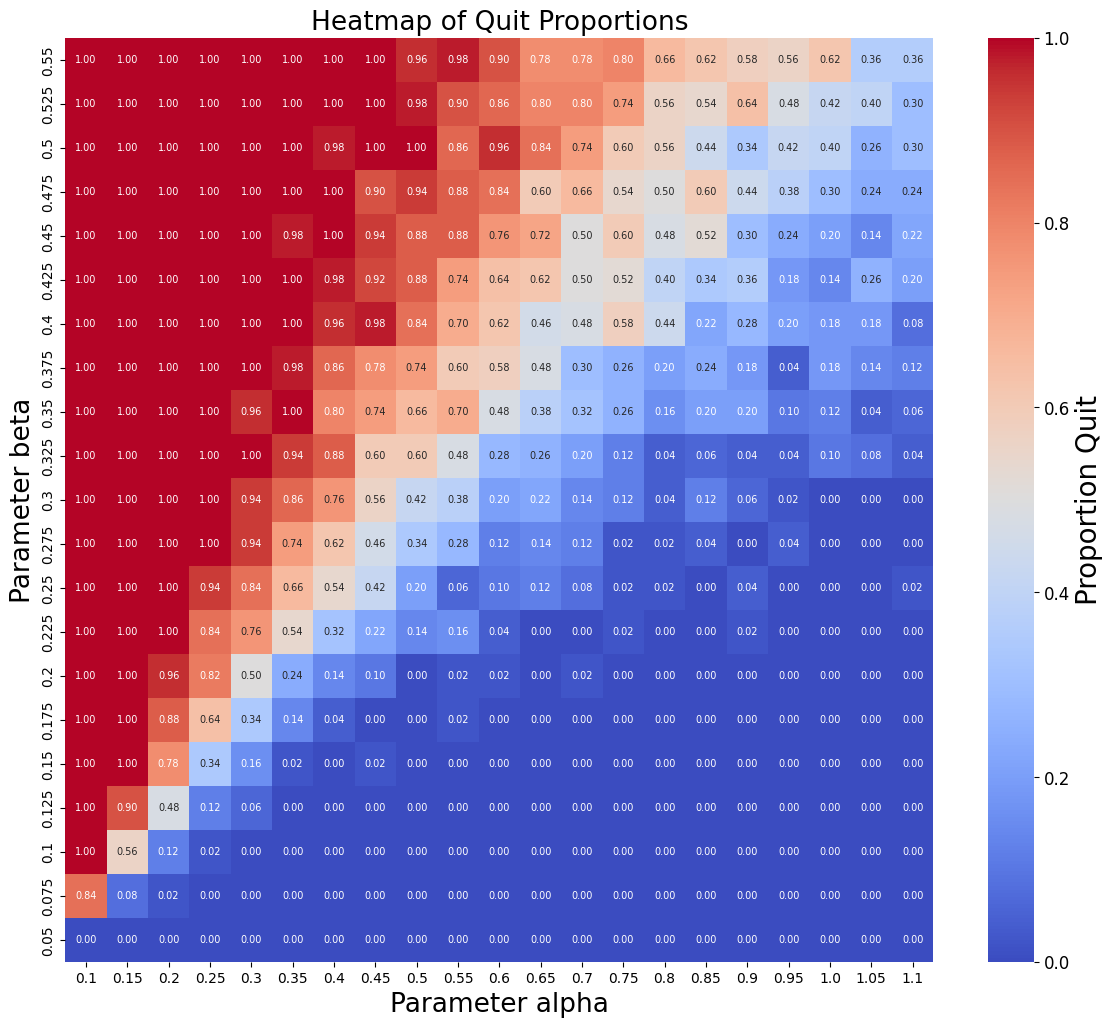

In [223]:
pivot_table = df_log_pars_alp_bet.pivot(index="beta", columns="alpha", values="prop_quit")

# Plotting the heatmap
plt.figure(figsize=(14, 12))
#ax = sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap="coolwarm", annot_kws={"fontsize":6}, cbar_kws={'label': 'Proportion Quit'})
ax = sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap="coolwarm", annot_kws={"fontsize":7})

ax.figure.axes[-1].set_ylabel('Proportion Quit', size=20)
plt.gca().invert_yaxis()

# Increase the label size for the color bar
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=12)


plt.title('Heatmap of Quit Proportions', fontsize=19)
plt.xlabel('Parameter alpha', fontsize=19)
plt.ylabel('Parameter beta', fontsize=19)
#plt.savefig('../plots/sens_log_heatmap_alp_bet.png', dpi=512)
plt.show()

# 2. Exponential Learning Curve (Concacve):
Default Parameters: $a = 0.2, b=5, \alpha=0.2, \beta=0.3$

Also, initial conditions:  $S_0 = 0.1, \lambda_0 = 1$


In [171]:
# run model for different values of parameter a and b:
a_vals = np.round(np.linspace(0, 1, 21), 3)
b_vals = np.round(np.linspace(0.1, 10.1, 21),3)

exp_par_dict =  {'a': a_vals, 
                 'b': b_vals, 
                 'alpha': 0.2, 
                 'beta': 0.3, 
                 'initial_skill': 0.1}

exp_sen = RPS_sensitivity(exp_par_dict, learning='exponential', forgetting='exp', 
                          practice_rate='simple', waiting_time='exp')
df_exp_pars = exp_sen.df_par
exp_sen.run_sensitivity_analysis(quit_thresh=0.1, n_sims=50, max_time=100)
df_exp_sim = exp_sen.df_sim


In [172]:
df_exp_sim.head(5)

,a,b,alpha,beta,initial_skill,final_skills,n_prac,prop_quit
0,0.0,0.1,0.2,0.3,0.1,3.967148e-05,3,0.94
1,0.0,0.1,0.2,0.3,0.1,2.609368e-07,5,0.94
2,0.0,0.1,0.2,0.3,0.1,3.233781e-14,1,0.94
3,0.0,0.1,0.2,0.3,0.1,3.236193e-14,1,0.94
4,0.0,0.1,0.2,0.3,0.1,1.711662e-02,2,0.94


## 2.1 Parameter $a$:

In [210]:
#rev_palette = sns.color_palette('mako').reverse()

######### Processing Data ###########

b_fixed = 5.1 # fix value of parameter b
a_vals = [0, 0.25, 0.5, 0.75, 1]

df_exp_a = df_exp_sim[(df_exp_sim['b']==b_fixed) & (df_exp_sim['a'].isin(a_vals))]
#df_exp_a

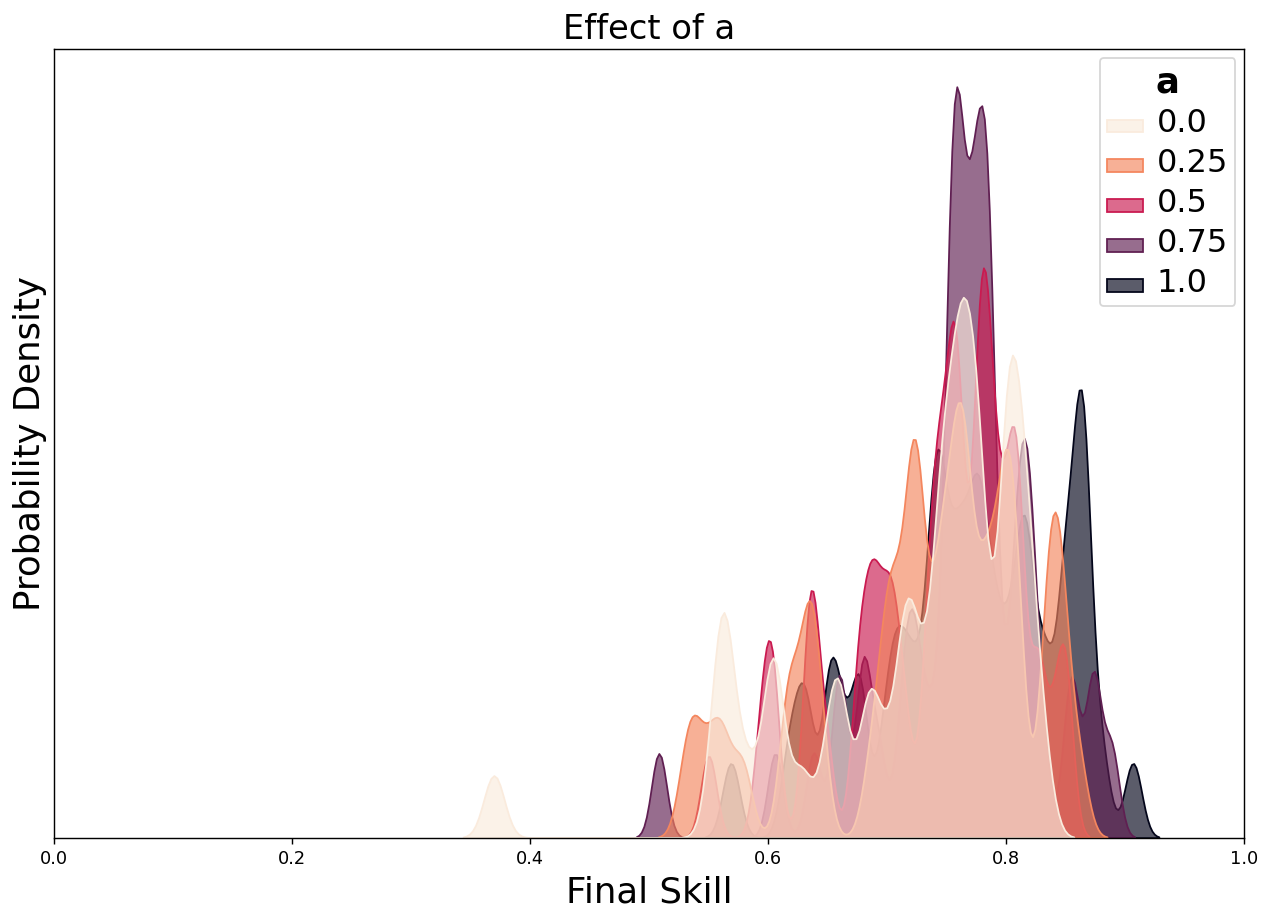

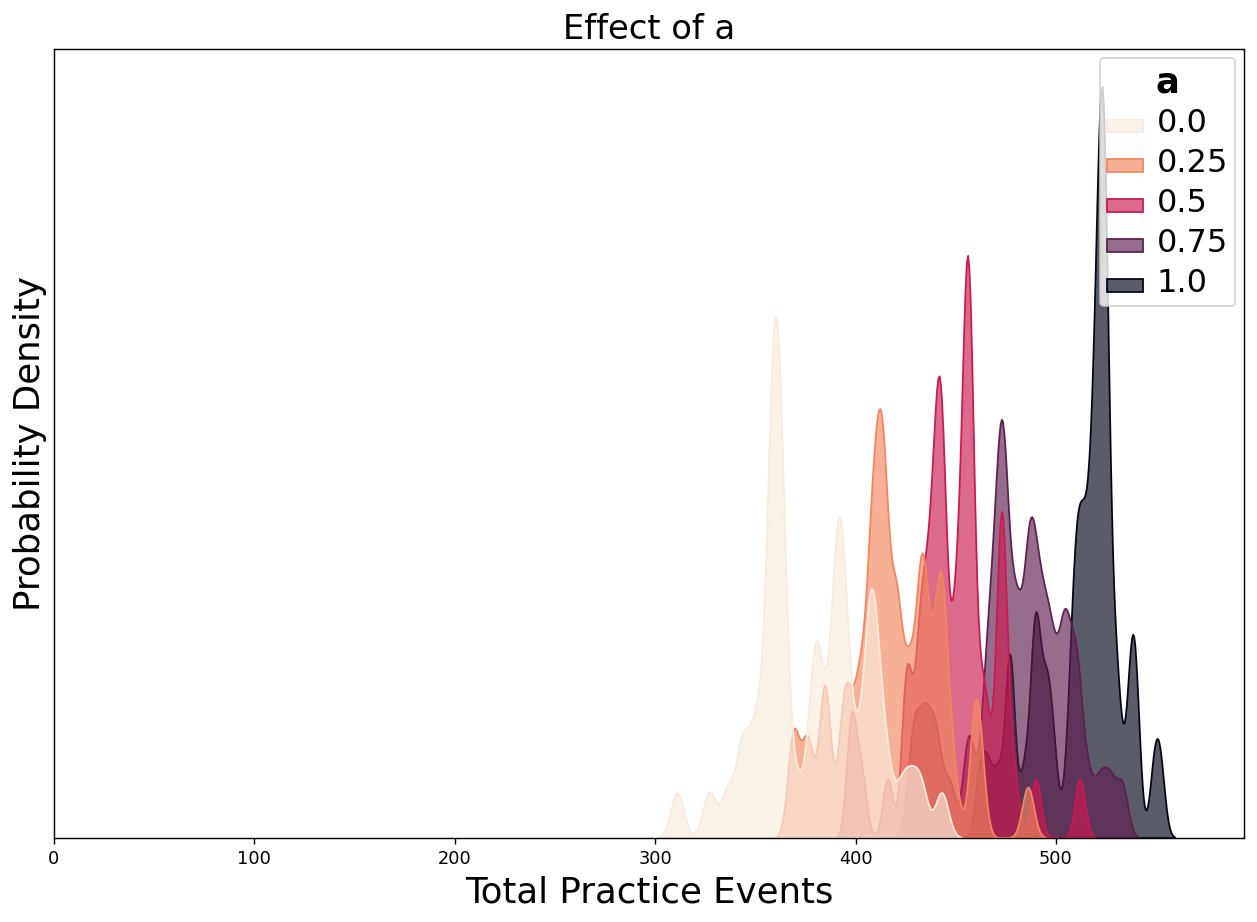

In [211]:
########################
## HISTOGRAM: FINAL SKILL
########################

# Set up the matplotlib figure
plt.figure(figsize=(12, 8), dpi=128)
#with sns.color_palette("mako"):
#ax_log = sns.kdeplot(df_log_a, x='final_skills', hue='a', alpha=.7, palette='rocket_r', fill=True,  bw_adjust=0.07, multiple='stack')
ax_log = sns.kdeplot(df_exp_a, x='final_skills', hue='a', alpha=.65, palette='rocket_r', fill=True,  bw_adjust=0.2)
plt.title('Effect of a', fontsize=19)
plt.xlim([0,1])
#plt.ylim([0,8])
#plt.tick_params(left=True, labelleft=True)

plt.tick_params(left=False, labelleft=False)
plt.xlabel('Final Skill', fontsize=20)
plt.ylabel('Probability Density', fontsize=20)
#plt.legend('a', fontsize=17)
#sns.move_legend(ax_log, "upper left")

# for legend text
plt.setp(ax_log.get_legend().get_texts(), fontsize='18')  
# for legend title
plt.setp(ax_log.get_legend().get_title(), fontsize='20', text='a', fontweight='heavy')  


#plt.savefig('../plots/sens_exp_a_finalS.png', dpi=512)
# Display the plot
plt.show()

####################################
## HISTOGRAM: TOTAL PRACTICE EVENTS
###################################

# Set up the matplotlib figure
plt.figure(figsize=(12, 8), dpi=128)
#with sns.color_palette("mako"):
ax_log = sns.kdeplot(df_exp_a, x='n_prac', hue='a', alpha=.65, palette='rocket_r', fill=True,  bw_adjust=0.25)
plt.title('Effect of a', fontsize=19)
plt.xlim([0,max(df_log_a['n_prac'])])
#plt.tick_params(left=True, labelleft=True)

plt.tick_params(left=False, labelleft=False)
plt.xlabel('Total Practice Events', fontsize=20)
plt.ylabel('Probability Density', fontsize=20)
#sns.move_legend(ax_log, "upper left")

# for legend text
plt.setp(ax_log.get_legend().get_texts(), fontsize='18')  
# for legend title
plt.setp(ax_log.get_legend().get_title(), fontsize='20', text='a', fontweight='heavy')  


#plt.savefig('../plots/sens_exp_a_nprac.png', dpi=512)
# Display the plot
plt.show()

## 2.2 Parameter $b$:

In [183]:
a_fixed = 0.6 # fix value of parameter a
b_vals = [2.1 + i for i in range(5)]

df_exp_b = df_exp_sim[(df_exp_sim['a']==a_fixed) & (df_exp_sim['b'].isin(b_vals))]
df_exp_b.head(5)

,a,b,alpha,beta,initial_skill,final_skills,n_prac,prop_quit
12800,0.6,2.1,0.2,0.3,0.1,0.593869,193,0.0
12801,0.6,2.1,0.2,0.3,0.1,0.568945,170,0.0
12802,0.6,2.1,0.2,0.3,0.1,0.517653,209,0.0
12803,0.6,2.1,0.2,0.3,0.1,0.583948,188,0.0
12804,0.6,2.1,0.2,0.3,0.1,0.428201,199,0.0


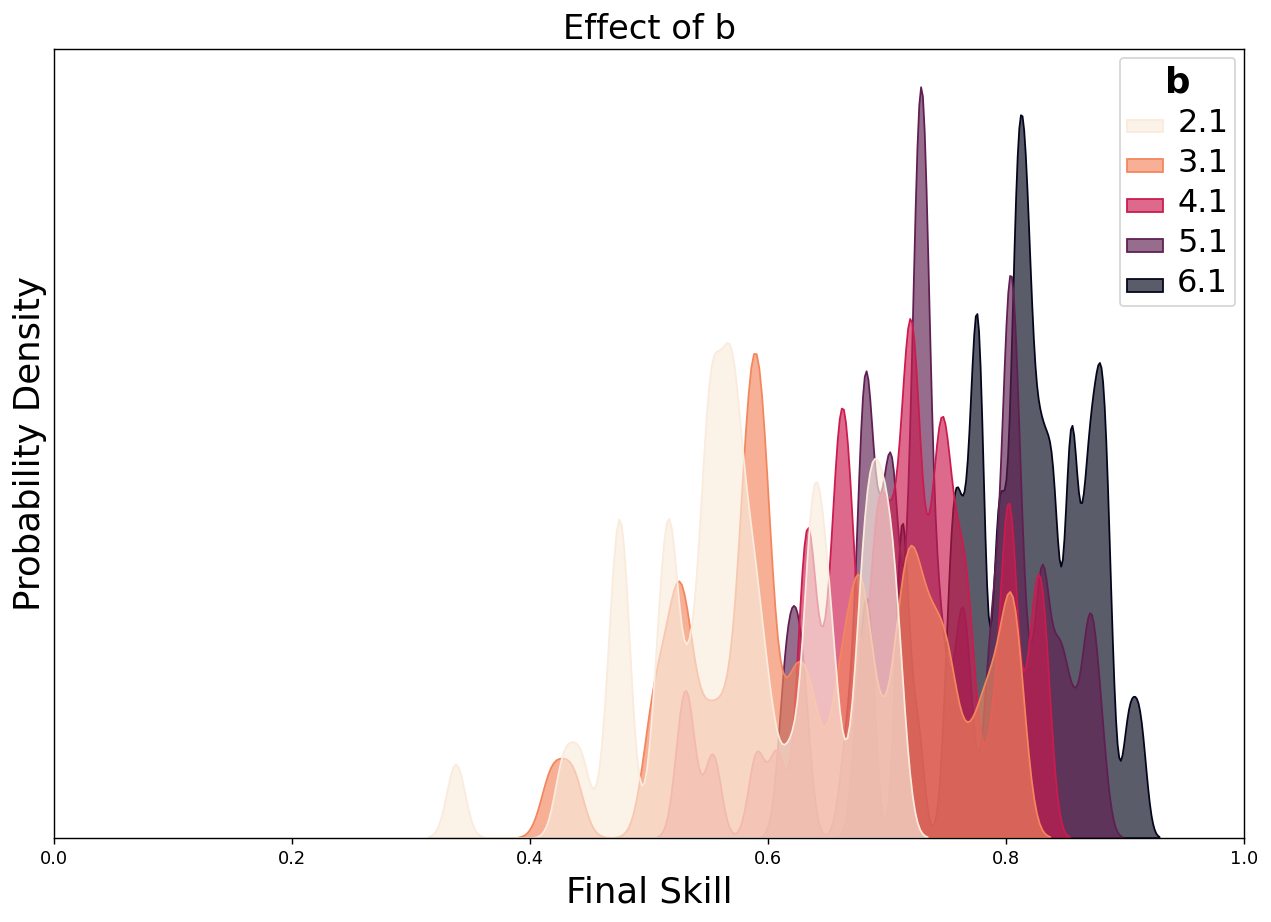

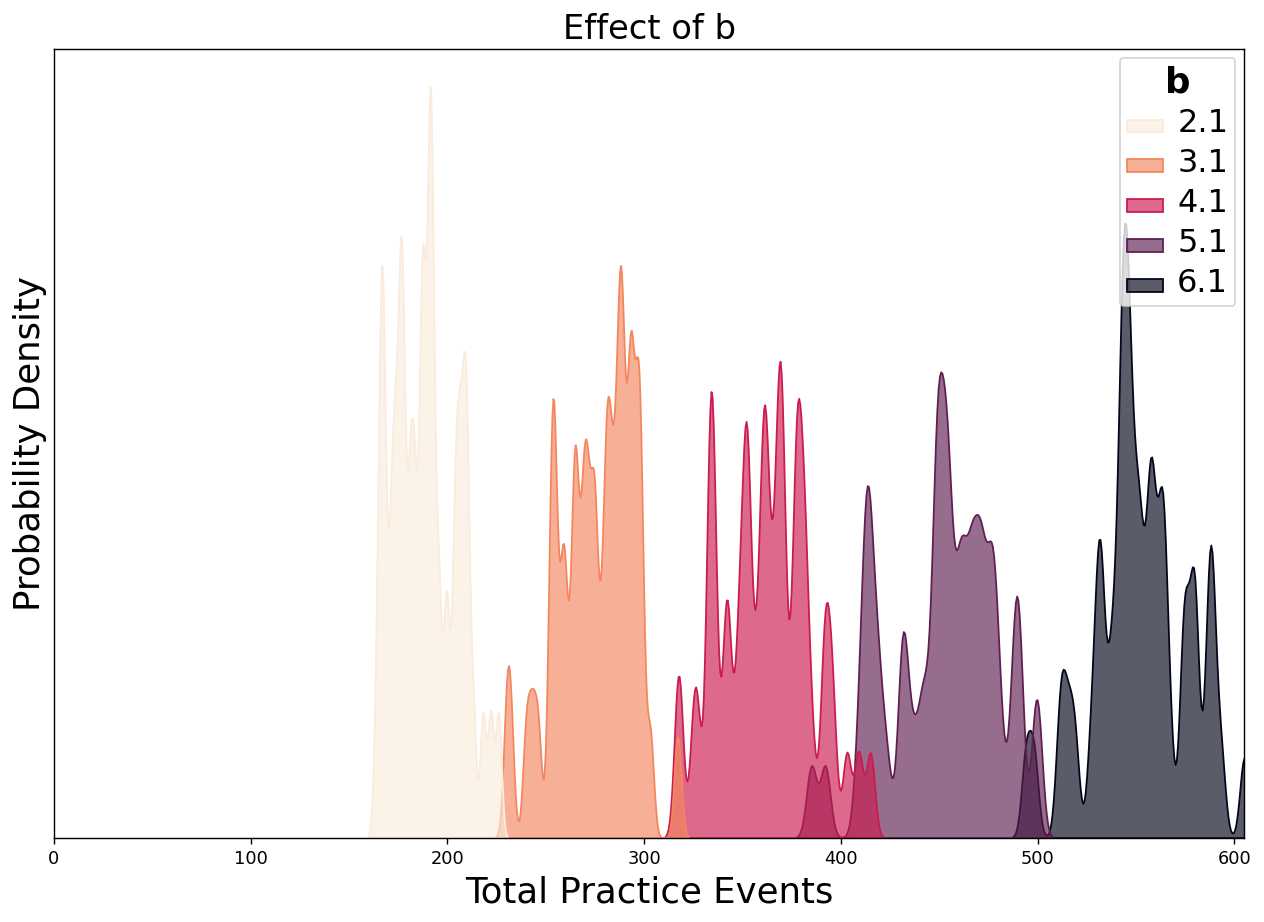

In [184]:
########################
## HISTOGRAM: FINAL SKILL
########################

# Set up the matplotlib figure
plt.figure(figsize=(12, 8), dpi=128)
ax_log = sns.kdeplot(df_exp_b, x='final_skills', hue='b', alpha=.65, palette='rocket_r', fill=True,  bw_adjust=0.2)
plt.title('Effect of b', fontsize=19)
plt.xlim([0,1])
plt.tick_params(left=False, labelleft=False)
plt.xlabel('Final Skill', fontsize=20)
plt.ylabel('Probability Density', fontsize=20)
#sns.move_legend(ax_log, "upper left")

# for legend text
plt.setp(ax_log.get_legend().get_texts(), fontsize='18')  
# for legend title
plt.setp(ax_log.get_legend().get_title(), fontsize='20', text='b', fontweight='heavy')  

#plt.savefig('../plots/sens_exp_b_finalS.png', dpi=512)
# Display the plot
plt.show()

####################################
## HISTOGRAM: TOTAL PRACTICE EVENTS
###################################

# Set up the matplotlib figure
plt.figure(figsize=(12, 8), dpi=128)
ax_log = sns.kdeplot(df_exp_b, x='n_prac', hue='b', alpha=.65, palette='rocket_r', fill=True,  bw_adjust=0.2)
plt.title('Effect of b', fontsize=19)
plt.xlim([0,max(df_exp_b['n_prac'])])
#plt.tick_params(left=True, labelleft=True)
plt.tick_params(left=False, labelleft=False)
plt.xlabel('Total Practice Events', fontsize=20)
plt.ylabel('Probability Density', fontsize=20)
# for legend text
plt.setp(ax_log.get_legend().get_texts(), fontsize='18')  
# for legend title
plt.setp(ax_log.get_legend().get_title(), fontsize='20', text='b', fontweight='heavy')  
#sns.move_legend(ax_log, "upper left")

#plt.savefig('../plots/sens_exp_b_nprac.png', dpi=512)
# Display the plot
plt.show()

## 2.3 Heatmap $a,b$

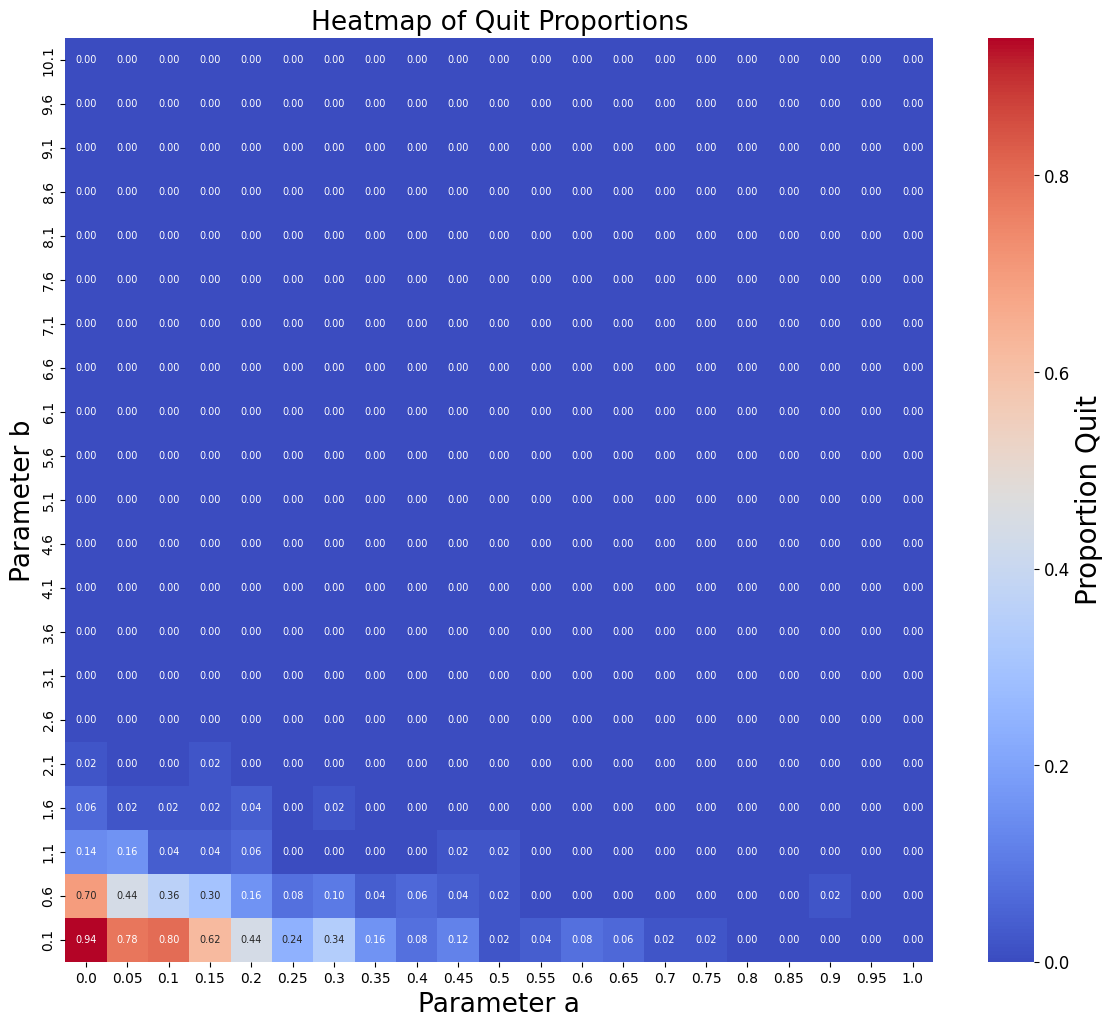

In [190]:
pivot_table = df_exp_pars.pivot(index="b", columns="a", values="prop_quit")

# Plotting the heatmap
plt.figure(figsize=(14, 12))
#ax = sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap="coolwarm", annot_kws={"fontsize":6}, cbar_kws={'label': 'Proportion Quit'})
ax = sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap="coolwarm", annot_kws={"fontsize":7})

ax.figure.axes[-1].set_ylabel('Proportion Quit', size=20)
plt.gca().invert_yaxis()

# Increase the label size for the color bar
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=12)


plt.title('Heatmap of Quit Proportions', fontsize=19)
plt.xlabel('Parameter a', fontsize=19)
plt.ylabel('Parameter b', fontsize=19)
#plt.savefig('../plots/sens_exp_heatmap_ab.png', dpi=512)
plt.show()

# 3. Dynamical Model Bifurcations:

$$ \frac{dS}{dt} = \lambda(S) \cdot f(S) - \beta S $$

## 3.1 Logistic Equation:
$$ \frac{dS}{dt} = (-b \alpha)S^3 +(b-a) \alpha S  + (a \alpha - \beta)*S $$ 

## 3.2 Exponential Equation"
$$ \ $$




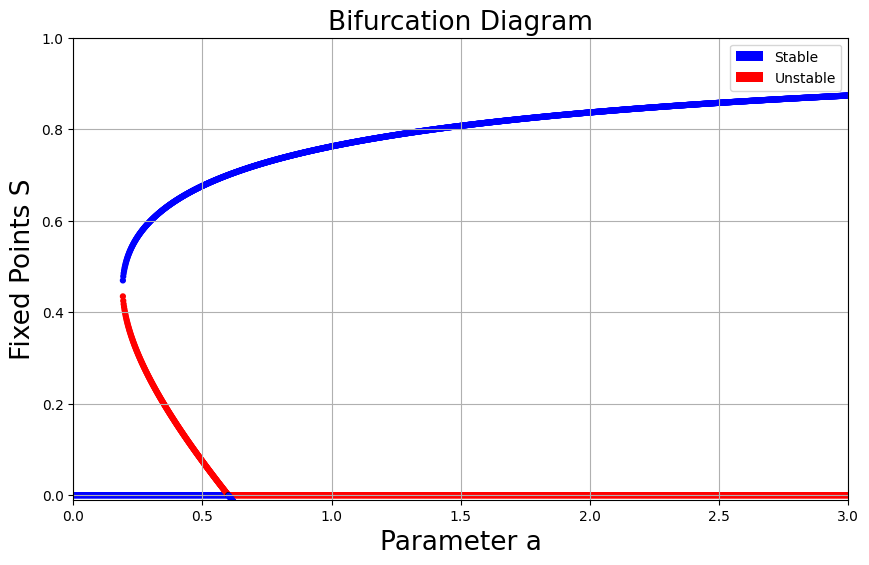

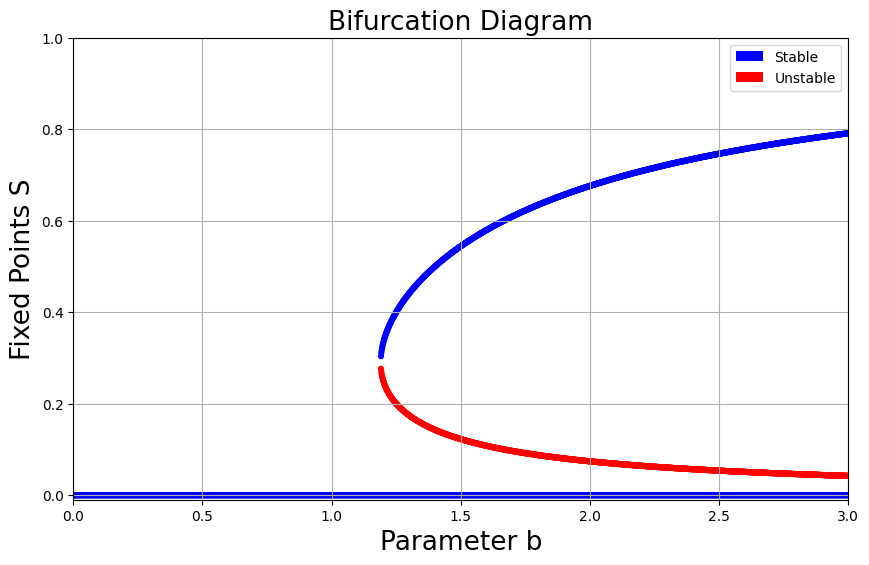

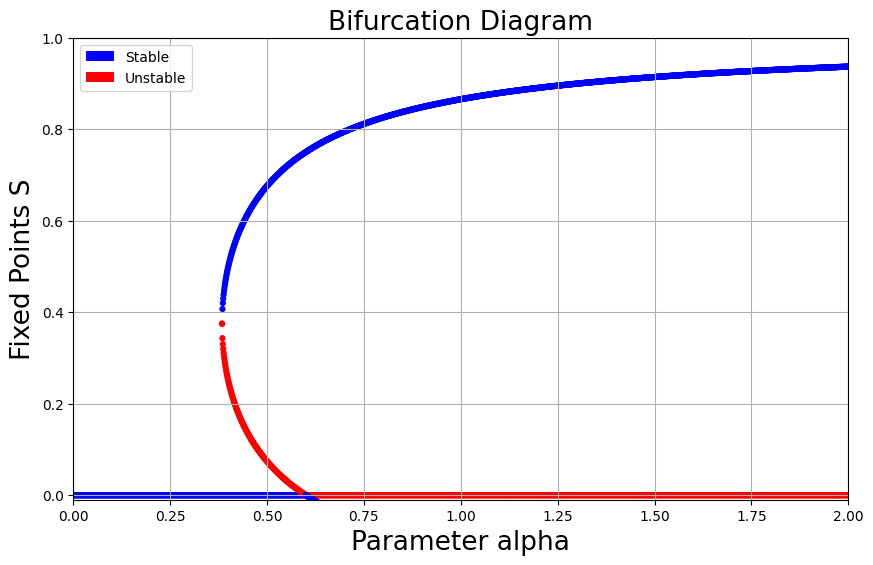

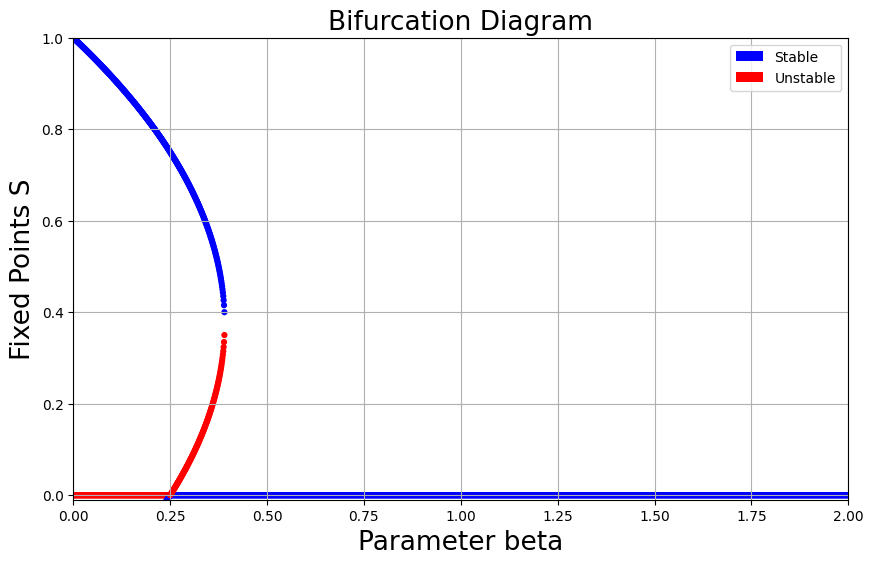

In [2]:
logistic = logistic_model(a=0.5, b=2, alpha=0.5, beta=0.3)
#fps = logistic.find_fixed_points()

# Bifurcation diagrams
logistic.make_bifurcation(bf_par='a', par_vals=np.linspace(0,3,2001)) # a (min practice)
logistic.make_bifurcation(bf_par='b', par_vals=np.linspace(0,3,2001)) # b (sensitivity to success)
logistic.make_bifurcation(bf_par='alpha', par_vals=np.linspace(0,2,2001)) # learning rate
logistic.make_bifurcation(bf_par='beta', par_vals=np.linspace(0,2,2001)) # forgetting rate

## 2. Concave Learning Curve:

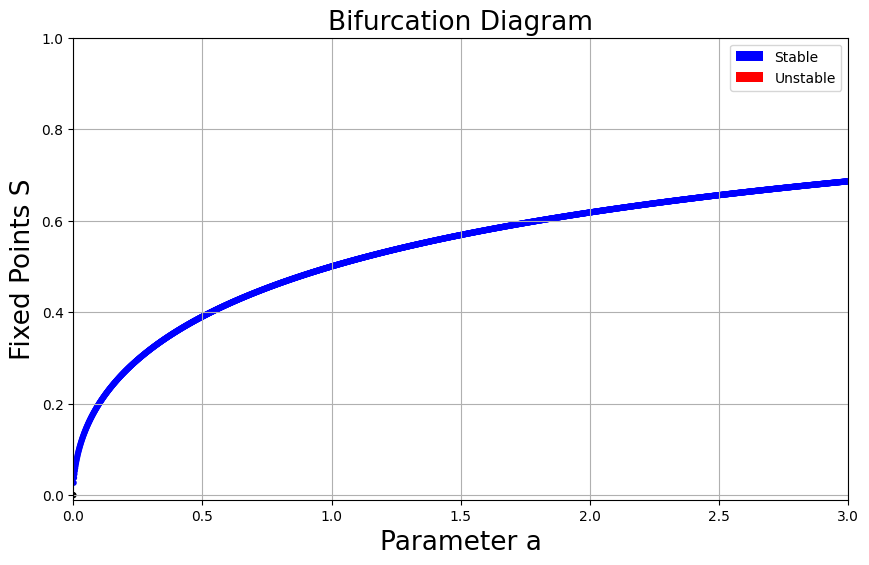

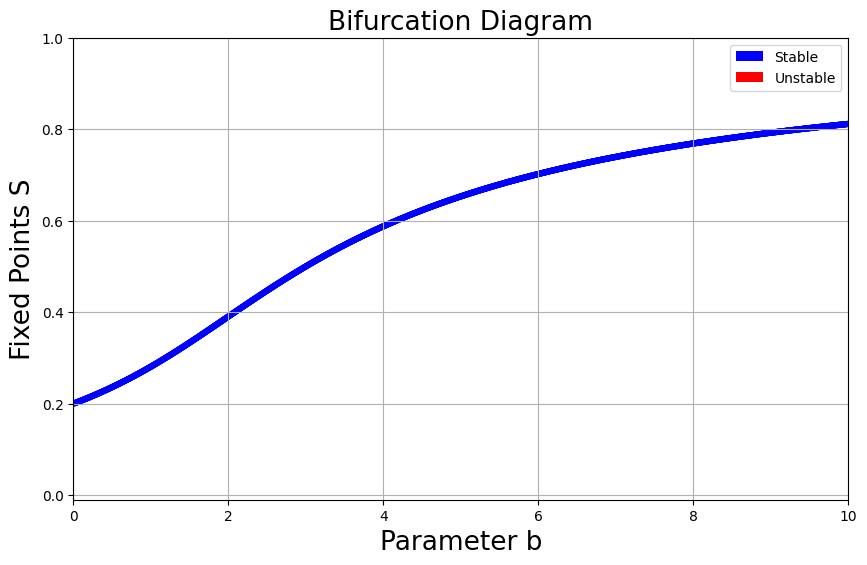

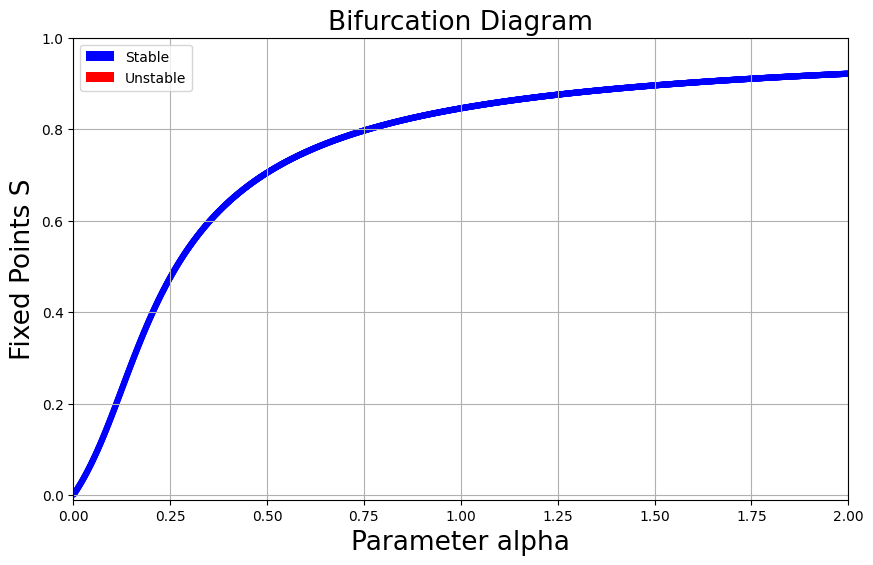

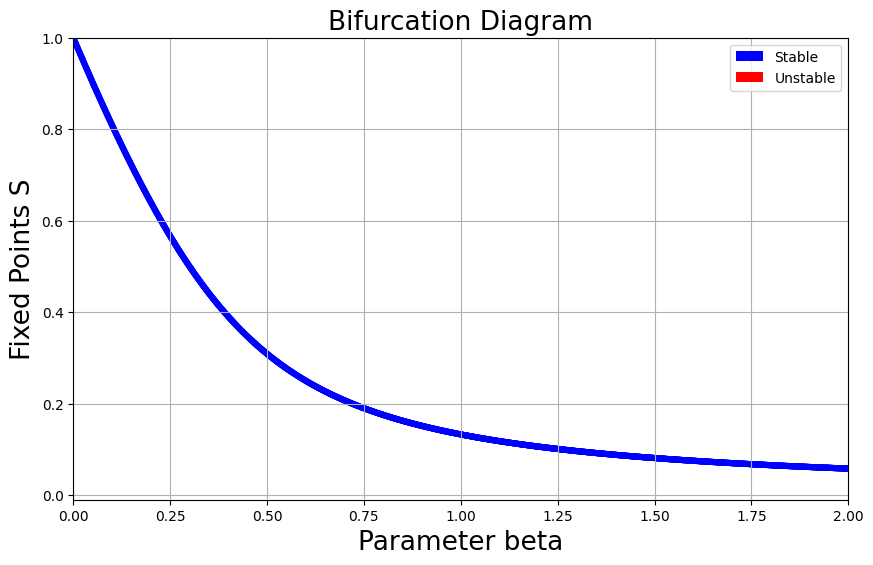

In [3]:
# define differential equn for concave exp. learning:
S,a,b,alpha,beta = sp.symbols('S,a,b,alpha,beta') # define symbols
exp_diff = -(b*alpha)*S**2 + ((b-a)*alpha - beta)*S +a*alpha

# Initialize the dynamical model:
exp_learn = general_model(params={'a':0.5, 'b':2, 'alpha':0.2, 'beta':0.4}, diff_eqn=exp_diff)

# Bifurcation diagrams
exp_learn.make_bifurcation(bf_par='a', par_vals=np.linspace(0,3,2001)) # a (min practice)
exp_learn.make_bifurcation(bf_par='b', par_vals=np.linspace(0,10,2001)) # b (sensitivity to success)
exp_learn.make_bifurcation(bf_par='alpha', par_vals=np.linspace(0,2,2001)) # learning rate
exp_learn.make_bifurcation(bf_par='beta', par_vals=np.linspace(0,2,2001)) # forgetting rate

## 3. Compound-Exponential Curve:
Murre's compound exponential family.

In [24]:
# define differential equn for compound-exponential learning:
S,a,b,alpha,beta,nu = sp.symbols('S,a,b,alpha,beta,nu') # define symbols
compound_exp_diff = (alpha*nu)*(alpha*S**(1-1/nu) - (a + (beta/(nu*alpha)))*S + (b*S**(2-1/nu)) - b*S**2)

print('Compound Exponential Dynamics: ')
compound_exp_diff

Compound Exponential Dynamics: 


alpha*nu*(-S**2*b - S*(a + beta/(alpha*nu)) + S**(1 - 1/nu)*alpha + S**(2 - 1/nu)*b)

In [25]:
s_vals = np.linspace(0,1, 2001)
nu_vals = [1, 2, 3, 5]

fp_list = []
for nu1 in nu_vals:
    temp_fp =[]
    for s1 in s_vals:
        temp_fp.append(compound_exp_diff.subs([(a, 0.5), (b, 2), (alpha, 0.2), (beta, 0.2), (nu, nu1), (S, s1)]))
    fp_list.append(temp_fp)


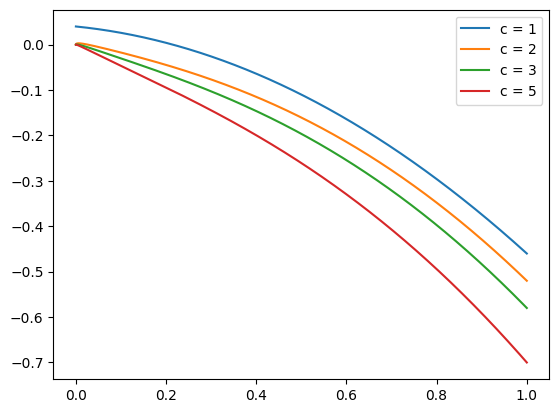

In [23]:
for i in range(len(fp_list)):
    plt.plot(s_vals, fp_list[i], label='c = ' + str(nu_vals[i]))
plt.legend()
plt.show()

In [5]:

S,a,b,alpha,beta = sp.symbols('S,a,b,alpha,beta')
con_eqn = -(b*alpha)*S**2 + ((b-a)*alpha - beta)*S +a*alpha
log_eqn = -(b*alpha)*(S**3) + (b-a)*alpha*(S**2) + (a*alpha - beta)*S

con_model = general_model(params={'a':0.5, 'b':2, 'alpha':0.2, 'beta':0.4}, diff_eqn=con_eqn)
log_model = general_model(params={'a':0.5, 'b':2, 'alpha':0.2, 'beta':0.3}, diff_eqn=log_eqn)

In [6]:
o1 = con_model.find_fixed_points()
o2 = log_model.find_fixed_points()

print(o1)
print(o2)

{'fixed_points': [-0.364434493427831*sqrt(2) - 0.125, -0.125 + 0.364434493427831*sqrt(2)], 'stability': [-1, 1], 'derivative': [0.291547594742265*sqrt(2), -0.291547594742265*sqrt(2)]}
{'fixed_points': [0], 'stability': [1], 'derivative': [-0.200000000000000]}


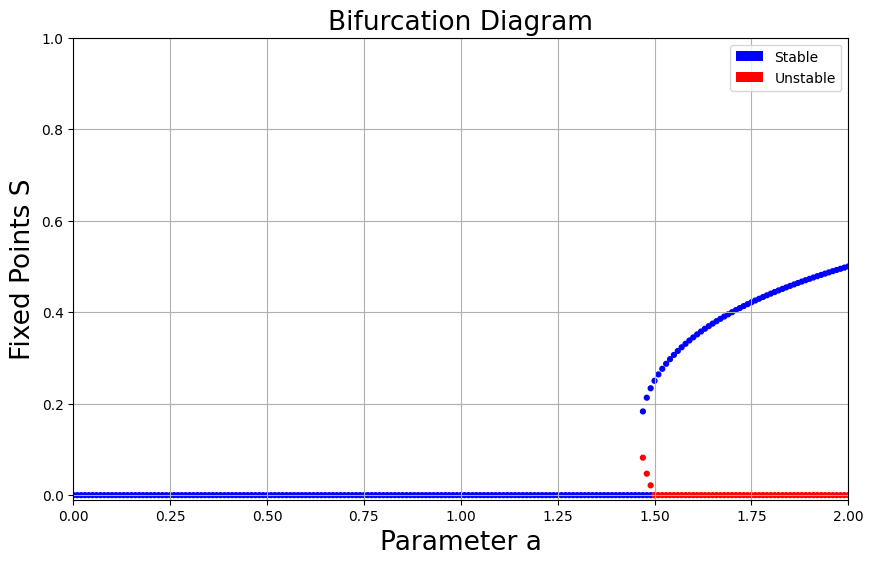

In [7]:
log_model.make_bifurcation('a', np.linspace(0,2,201))